## Defining the Functions and Designing the Circuits:

In [1]:
#------------------------------------------------------------------------
# FUNCTION THAT SETS THE TELEPORT CIRCUIT ON THE 3 BASES:
#------------------------------------------------------------------------
def TELEPORTE(BASE):
    import math as MT; PI = MT.pi;
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit;
#------------------------------
    Q  = QuantumRegister(  3, name = 'm');
    C = ClassicalRegister( 1, name = 'c');
    QC = QuantumCircuit( Q, C, name = "TELEPORTE");
#------------------------------
    QC.h(Q[0]);
    QC.barrier();
    QC.h(Q[1]); QC.cx(Q[1], Q[2]); QC.cx(Q[0], Q[1]); QC.h(Q[0]);
    QC.barrier();
    QC.cx(Q[1], Q[2]); QC.h(Q[2]); QC.cx(Q[0], Q[2]); QC.h(Q[2]);
    QC.barrier();
#------------------------------
    if (BASE == 'Z'):
       print(' MEDINDO NA BASE SIGMA_Z');
#------------------------------
#   SIGMA X
#------------------------------
    if (BASE == 'X'):
       print(' MEDINDO NA BASE SIGMA_X');
       QC.h(Q[2]);
#------------------------------
#   SIGMA Y
#------------------------------
    if (BASE == 'Y'):
       print(' MEDINDO NA BASE SIGMA_Y');
       QC.sdg(Q[2]); QC.h(Q[2]);
#------------------------------
#   QC.barrier();
    QC.measure(Q[2], C[0]);
#------------------------------
    return QC;
#------------------------------------------------------------------------
# FUNCTION THAT PERFORMS THE CIRCUIT ON THE LOCAL MACHINE:
#------------------------------------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer;
    from qiskit  import execute;
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\'';
    BACKEND = Aer.get_backend(BACKEND_NAME);
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    RESULT = EXP.result();
    print(' RESULTS:');
#   print('   EXP.result():', RESULT); # <-- PRINTS A LOT OF THINGS
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
#   print('   data:',         RESULT.data); <-- PRINTS A LOT OF THINGS
    print('   get_counts():', RESULT.get_counts() );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();
#------------------------------------------------------------------------
# FUNCTION TO CREATE THE HISTOGRAM:
#------------------------------------------------------------------------
def PLOT_HISTOGRAMS( DATA, LEGEND ):
    from qiskit.tools.visualization import plot_histogram, iplot_histogram;
    BAR_LABELS = True; # <-- SHOW PROBABILITIES ABOVE HISTOGRAM BARS
    HIST = plot_histogram( DATA, legend = LEGEND, bar_labels = BAR_LABELS, figsize = (15, 4) );
    display(HIST);
    return None;

 MEDINDO NA BASE SIGMA_Z


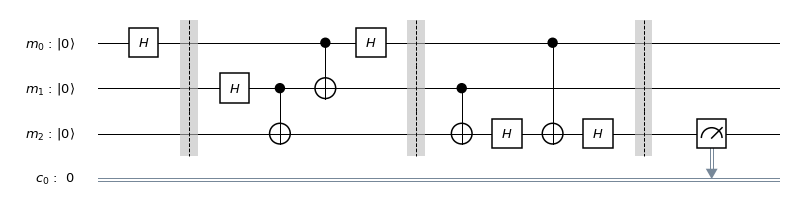

 MEDINDO NA BASE SIGMA_X


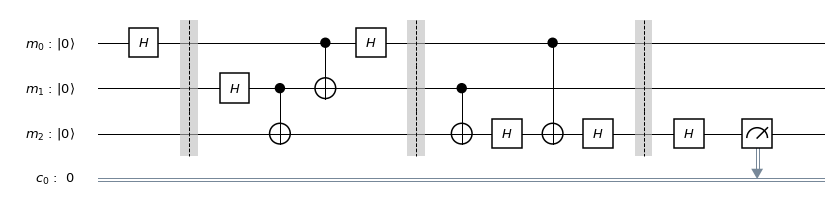

 MEDINDO NA BASE SIGMA_Y


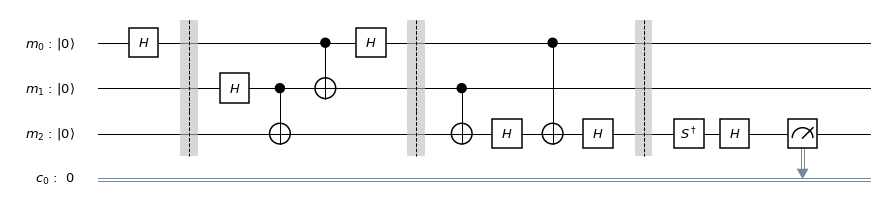

In [3]:
QCZ = TELEPORTE('Z'); display( QCZ.draw(output='mpl') );
QCX = TELEPORTE('X'); display( QCX.draw(output='mpl') );
QCY = TELEPORTE('Y'); display( QCY.draw(output='mpl') );

## Simulating the Circuit on the Local Machine

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0': 4122, '1': 4070}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0': 8192}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0': 4115, '1': 4077}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


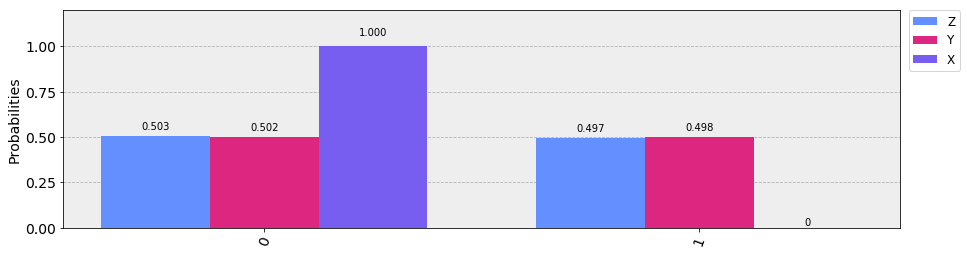

In [4]:
N_SHOTS = 2**(13);
BACKEND_NAME = "qasm_simulator";

DADOS_Z = SIMULADOR_LOCAL(QCZ, N_SHOTS, BACKEND_NAME);
DADOS_X = SIMULADOR_LOCAL(QCX, N_SHOTS, BACKEND_NAME);
DADOS_Y = SIMULADOR_LOCAL(QCY, N_SHOTS, BACKEND_NAME);

PLOT_HISTOGRAMS( [DADOS_Z, DADOS_Y, DADOS_X],  ['Z', 'Y', 'X'] );

## Calculating the Average Values

In [12]:
#        |0>    -|1>
#-----------------------------------------------
# <Sz> <-- Average Value of Z
sigZ = (0.503 - 0.497);
print('<Sz>:', sigZ);
#-----------------------------------------------
# <Sy> <-- Average Value of Y
sigY = (0.502 - 0.498);
print('<Sy>:', sigY);
#-----------------------------------------------
# <Sx> <-- Average Value of X
sigX = (1.000 - 0.000);
print('<Sx>:', sigX);

<Sz>: 0.006000000000000005
<Sy>: 0.0040000000000000036
<Sx>: 1.0


## Calculating the Elements of the Density Matrix

In [13]:
rho_11 = (1 + sigZ);       print( rho_11 );
rho_12 = (sigX - 1j*sigY); print( rho_12 );
rho_21 = (sigX + 1j*sigY); print( rho_21 );
rho_22 = (1 - sigZ);       print( rho_22 );

1.006
(1-0.0040000000000000036j)
(1+0.0040000000000000036j)
0.994


In [14]:
#------------------------------------------------------------------------
# FUNCTION TO CREATE THE DENSITY MATRIX GRAPHIC:
#------------------------------------------------------------------------
def PLOT_STATE(n, RHO, TITLE):
    from mpl_toolkits.mplot3d import Axes3D;
    import matplotlib.pyplot as plt;
    import matplotlib.ticker as ticker;
    import numpy as np;
#-----------------------------------------------------------------------
    fig = plt.figure(); #fig = plt.figure(figsize=(8, 5));
    ax = fig.add_subplot(111, projection='3d');
    dz = np.asarray(RHO).real;
    OFSSET = 0.4; WIDTH  = 0.8;
#-----------------------------------------------------------------------
    if(n == 1):
        X  = [0,0,1,1]; Y = [0,1,0,1]; Z = np.zeros(4);
        dx = np.full(4, WIDTH, dtype=float); dy = dx;
        for i in range(len(X)):
            X[i] = X[i] - OFSSET;
            Y[i] = Y[i] - OFSSET;
        AXIS_LABELS = ( r'$\left|0\right\rangle$', r'$\left|1\right\rangle$' )
        plt.xticks([0, 1], AXIS_LABELS);
        plt.yticks([0, 1], AXIS_LABELS);
        COLORS = ['r', 'b', 'g', '#8E4585'];
        ax.set_xlim3d(-0.6,1.6); ax.set_ylim3d(-0.6,1.6);
#-----------------------------------------------------------------------
    if(n == 2):
        X = [0,0,0,0, 1,1,1,1, 2,2,2,2, 3,3,3,3];
        Y = [0,1,2,3, 0,1,2,3, 0,1,2,3, 0,1,2,3]; Z = np.zeros(16);
        dx = np.full(16, WIDTH, dtype=float); dy = dx;
        for i in range(len(X)):
            X[i] = X[i] - OFSSET;
            Y[i] = Y[i] - OFSSET;
        AXIS_LABELS = ( r'$\left|00\right\rangle$', r'$\left|01\right\rangle$', r'$\left|10\right\rangle$', r'$\left|11\right\rangle$' );
        plt.xticks([0, 1, 2, 3], AXIS_LABELS);
        plt.yticks([0, 1, 2, 3], AXIS_LABELS);
        COLORS = ['b', 'b', 'b', 'b',   'c', 'c', 'c', 'c',   'r', 'r', 'r', 'r',   'y', 'y', 'y', 'y'];
        ax.set_xlim3d(-0.6,3.6); ax.set_ylim3d(-0.6,3.6);
#-----------------------------------------------------------------------
    ax.set_zlim3d(-1.0,1.1);
#-------------------------
    #plt.tick_params(labelsize=14); # plt.xticks(fontsize=14, rotation=90); # ax2.xaxis.set_tick_params(labelsize=7)
    ax.set_zticks([-1.00, -0.50, 0.0, 0.50, 1.00], minor = False);
#-------------------------
    #ax.set_title(TITLE, fontsize=10);
    ax.set_title(r'$\mathtt{'+TITLE+'}$', fontsize=14);
#   ax.set_xlabel('$X$', fontsize=30); ax.set_ylabel('$Y$', fontsize=30);
    ax.zaxis.set_rotate_label(False);  # disable automatic rotation
#   ax.set_zlabel(r'$\rho$', fontsize = 20, rotation=0);
#-------------------------
#   ax.grid(False);
#   ax.xaxis.pane.set_edgecolor('black'); ax.yaxis.pane.set_edgecolor('black'); ax.zaxis.pane.set_edgecolor('black');
    ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False;
#-------------------------
    ax.azim = 225;
    ax.bar3d(X,Y,Z, dx,dy,dz, color=COLORS, alpha=0.5, linewidth=0);
    plt.show();
#-------------------------
    return None;

## DENSITY MATRIX: THEORY

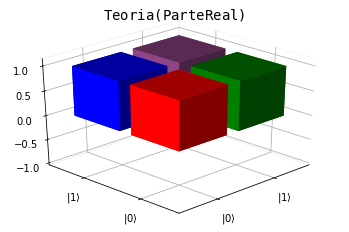

In [15]:
TITLE = 'Theory  (Real Part)';
RHO = [1.0, 1.0, 
       1.0, 1.0];
PLOT_STATE(1, RHO, TITLE);

## Density Matrix: Simulation

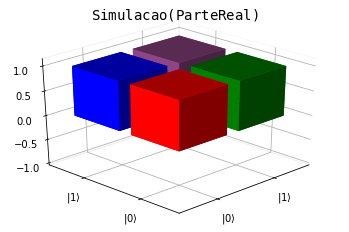

In [16]:
TITLE = 'Simulation (Real Part)';
RHO = [rho_11, rho_12, 
       rho_21, rho_22];
PLOT_STATE(1, RHO, TITLE);

## Simulating the Circuit on the Remote Machine at IBM Qiskit

In [5]:
#------------------------------------------------------------------------
# FUNCTION TO REGISTER WITH IBM:
#------------------------------------------------------------------------
def CHIP_REGISTER():
    from qiskit import IBMQ;
    from qiskit.tools.monitor import backend_overview;
#-----------------------------------------------------------------------
#   You can get the API token from https://quantumexperience.ng.bluemix.net/qx/account,
    QX_TOKEN = "7f34af94cd8e670eea5e2bc4e809b21bd2d9217ab1cf27b2e813a7618f7825e6701e1bb188b8e713414f9eb773a342ffe0d434d88f44579e532dc10daf3b1ddb";
    QX_URL   = "https://quantumexperience.ng.bluemix.net/api";
#-----------------------------------------------------------------------
   # try:
   # IBMQ.enable_account( QX_TOKEN );
    IBMQ.save_account(QX_TOKEN); # <-- NEW METHOD https://github.com/Qiskit/qiskit-ibmq-provider
       # print(' CHIP_REGISTER() DIZ:\n REGISTER OK');
  #  except:
   #     print(' CHIP_REGISTER() DIZ:\n Something went wrong.\n Did you enter a correct token?');
    return None;
#-----------------------------------------------------------------------
CHIP_REGISTER();

In [6]:
# GETTING A LOOK AT THE BACKENDS:
def CHECK_REMOTE_BACKENDS():
    from qiskit import IBMQ;
    from qiskit.tools.monitor import backend_overview;

    print('ARTIFICIAL:', IBMQ.backends( local = False, simulator = True) );
    print('CHIP REAL :', IBMQ.backends( local = False, simulator = False) );

    print("BACKEND_OVERVIEW():");
    #backend_overview();

    return None;

CHECK_REMOTE_BACKENDS();

ARTIFICIAL: []
CHIP REAL : []
BACKEND_OVERVIEW():


/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


In [6]:
#------------------------------------------------------------------------
# FUNCTION THAT PERFORMS THE CIRCUIT ON THE REMOTE MACHINE:
#------------------------------------------------------------------------
def SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME):
    from qiskit               import IBMQ;
    from qiskit               import execute;
    from qiskit.tools.monitor import job_monitor;
#--------------
    F_NAME = '\'SIMULADOR_REMOTO()\'';
    #BACKEND = IBMQ.get_backend(BACKEND_NAME);
# METODO NOVO:
    PROVIDER = IBMQ.load_account();
    #PROVIDER = IBMQ.enable_account('MY_API_TOKEN');
    BACKEND  = PROVIDER.get_backend(BACKEND_NAME);
#--------------
    STATUS  = BACKEND.status();
    if( STATUS.operational == False ):
        print(' FUNCAO %s DIZ:'% F_NAME );
        print(' ESTE BACKEND NAO ESTA OPERACIONAL NO MOMENTO, VEJA:');
        print("    STATUS.operational =",  STATUS);
        print(' ENCERRANDO'); return None;
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    job_monitor(EXP, interval = 5);

    RESULT = EXP.result();
    print(' RESULTS:');
#   print('   EXP.result():', RESULT); # <-- PRINTS A LOT OF THINGS
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
#   print('   data:',         RESULT.data); #<-- PRINTS A LOT OF THINGS
    print('   get_counts():', RESULT.get_counts() ); # print(' get_data() = ',   result.get_data(qc) );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0': 4095, '1': 4097}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0': 4119, '1': 4073}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0': 8192}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


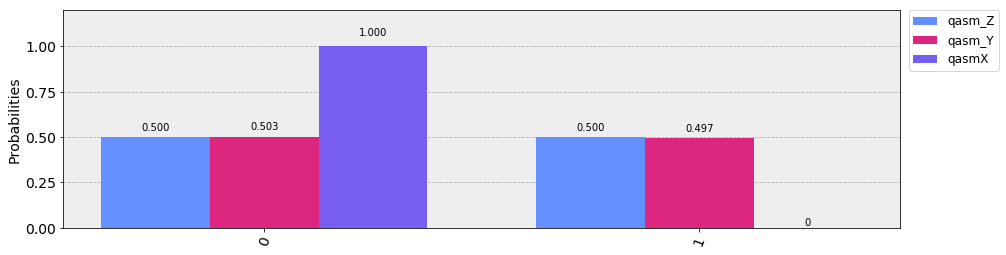

In [7]:
# EXECUTING THE CIRCUIT
N_SHOTS = 2**(13);

BACKEND_NAME = "ibmq_qasm_simulator";
DADOS_Z_qasm   = SIMULADOR_REMOTO(QCZ, N_SHOTS, BACKEND_NAME);
DADOS_Y_qasm   = SIMULADOR_REMOTO(QCY, N_SHOTS, BACKEND_NAME);
DADOS_X_qasm   = SIMULADOR_REMOTO(QCX, N_SHOTS, BACKEND_NAME);
#BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QCteleport, N_SHOTS, BACKEND_NAME);
#BACKEND_NAME = "ibmq_16_melbourne";   DADOS_melbourne = SIMULADOR_REMOTO(QCteleport, N_SHOTS, BACKEND_NAME);

# BACKEND_NAME = "ibmqx4";
# BACKEND_NAME = "ibmq_16_melbourne";

PLOT_HISTOGRAMS( [DADOS_Z_qasm, DADOS_Y_qasm, DADOS_X_qasm],  ['qasm_Z', 'qasm_Y', 'qasmX'] );

In [ ]:
N_SHOTS = 2**(13);
BACKEND_NAME = "qasm_simulator";

DADOS_Z = SIMULADOR_LOCAL(QCZ, N_SHOTS, BACKEND_NAME);
DADOS_X = SIMULADOR_LOCAL(QCX, N_SHOTS, BACKEND_NAME);
DADOS_Y = SIMULADOR_LOCAL(QCY, N_SHOTS, BACKEND_NAME);

PLOT_HISTOGRAMS( [DADOS_Z, DADOS_Y, DADOS_X],  ['Z', 'Y', 'X'] );